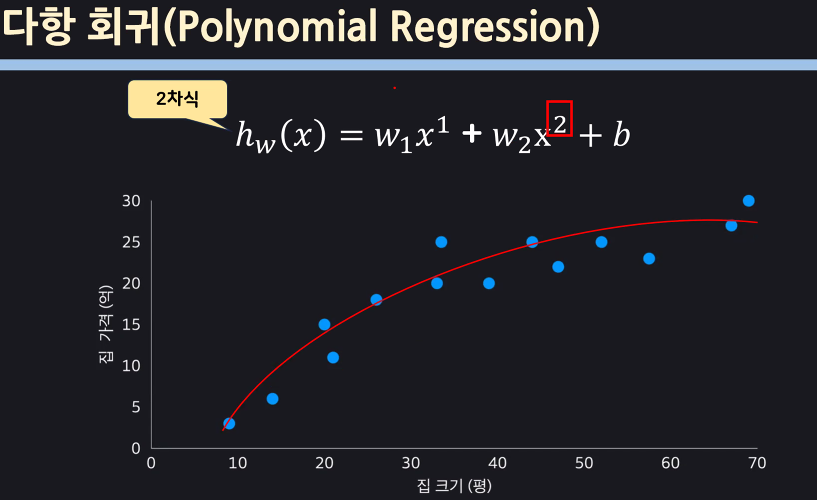

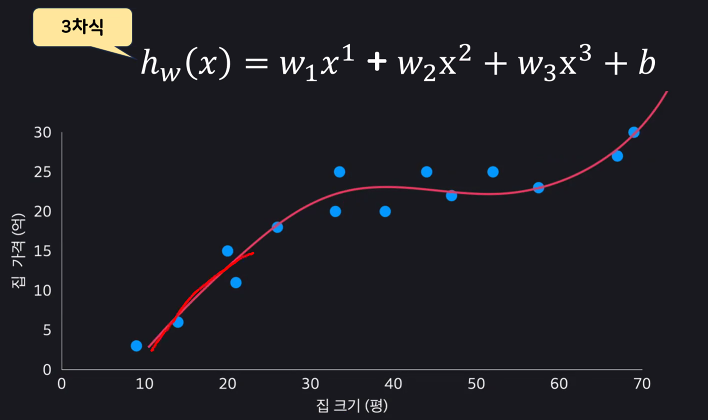

# 보스턴 집 값 데이터 실습
- 보스턴 집 값 데이터를 활용하여 다항회귀를 구현해보자

### 다항회귀
- 선형 모델의 수식에서 입력 특성에 2차 이상의 항이 포함된 경우
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능 개선의 여지가 있다

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 한글 안깨지도록 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
boston = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [4]:
boston.shape

(506, 13)

In [5]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# 훈련용 데이터와 평가용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(boston,
                                                    target,
                                                    test_size=0.3)

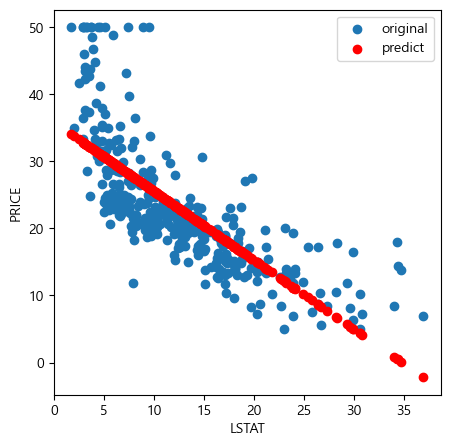

In [7]:
# 데이터 분포 확인
plt.figure(figsize =(5,5))
plt.scatter(X_train['LSTAT'],y_train, label='original')

# 선형회귀 모델 학습
LSTAT_model = LinearRegression()
LSTAT_model.fit(X_train[['LSTAT']],y_train)
# 선형모델의 예측 결과 확인
pre = LSTAT_model.predict(X_train[['LSTAT']])
plt.scatter(X_train['LSTAT'], pre, label='predict' ,color ='red')

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

plt.show()

### 다항회귀 구현하기
1. 특성확장을 통해서 다항식을 만들어주기
2. sklearn의 PolynomialFeatures를 이용하기

In [8]:
# 특성확장 
X_train['LSTAT x LSTAT']= X_train['LSTAT']**2

In [9]:
# 모델학습
LSTAT_model2 = LinearRegression()
LSTAT_model2.fit(X_train[['LSTAT','LSTAT x LSTAT']], y_train)

LinearRegression()

In [10]:
# 예측
pre2 = LSTAT_model2.predict(X_train[['LSTAT','LSTAT x LSTAT']])

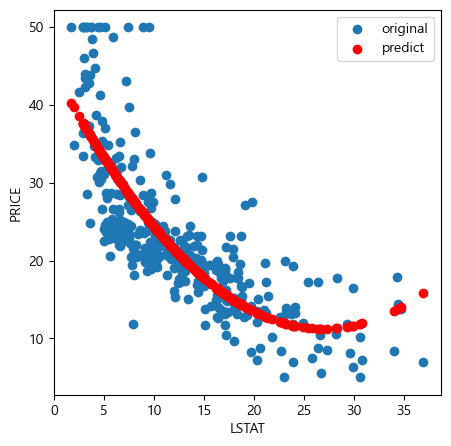

In [11]:
# 데이터 분포 확인
plt.figure(figsize =(5,5))
plt.scatter(X_train['LSTAT'],y_train, label='original')

# 특성확장 모델
plt.scatter(X_train['LSTAT'], pre2, label='predict' ,color ='red')

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

plt.show()

### 선형회귀 VS 다항회귀 비교

#### 단순 선형회귀

In [49]:
# 데이터 다시 불러오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [50]:
boston = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [51]:
# 훈련용 데이터와 평가용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(boston,
                                                    target,
                                                    test_size=0.3)

In [52]:
lr_model = LinearRegression()

In [53]:
# 훈련 학습
lr_model.fit(X_train,y_train)

LinearRegression()

In [54]:
# 예측
pre= lr_model.predict(X_test)

In [55]:
# 평가(mse, rmse)
# mse : 평균제곱오차
mse = mean_squared_error(y_test,pre)
print("단순선형회귀 mse 값 : " , mse)
# rmse : 평균 제곱근 오차
rmse= mse** 0.5
print("단순선형회귀 rmse값 : " , rmse)

단순선형회귀 mse 값 :  21.95496536944639
단순선형회귀 rmse값 :  4.6856125927616326


#### 다항변형기(PolynomialFeatures)를 사용하여 다항회귀 구현

In [146]:
# 다항변형기 생성
polynomial_transformer = PolynomialFeatures(2 , include_bias=False)

In [147]:
polynomial_data = polynomial_transformer.fit_transform(boston) # 특성확장

In [148]:
polynomial_data.shape

(506, 104)

In [149]:
boston.shape

(506, 13)

In [150]:
# 특성확장 후 컬럼명 확인
polynomial_features_names = polynomial_transformer.get_feature_names_out(boston.columns)

In [151]:
polynomial_features_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [152]:
# 문제 데이터 재생성 - polynomial을 진행한 데이터를
# 활용해 데이터 프레임 생성
X = pd.DataFrame(polynomial_data, columns = polynomial_features_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [153]:
# 훈련용 데이터와 평가용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    target,
                                                    test_size=0.3)

In [154]:
# 모델생성
lr_model = LinearRegression()

In [155]:
# 학습
lr_model.fit(X_train, y_train)

LinearRegression()

In [156]:
# 예측
pre3 = lr_model.predict(X_test)

In [157]:
# 평가 (mse)
# 평균제곱오차(MSE) 출력하기
# 평균제곱오차(MSE) : 실제값과 예측값의 차이 제곱 후 평균 낸 값
mse = mean_squared_error(y_test,pre3)
rmse= mse** 0.5
rmse
print("다항회귀 mse : ",mse)
print("다항회귀 rmse : ", rmse)

다항회귀 mse :  18.992624511351107
다항회귀 rmse :  4.358052834850802


In [158]:
# 가중치 (w) .coef_
lr_model.coef_

array([ 2.85687458e+00,  6.90196282e-02, -5.83152609e+00,  2.54801500e+01,
       -6.53432126e+01,  2.61752057e+00,  8.98353883e-01, -1.08144798e+01,
        5.84181916e+00,  9.84992151e-03,  1.10851433e-01, -3.46058531e-03,
       -1.47683213e-01,  8.27125965e-04,  2.59296974e-01,  4.76288898e-01,
        2.21234257e+00, -4.31371648e-01,  3.50768589e-01, -2.68805271e-03,
       -3.79701149e-01,  6.07095529e-01, -5.01352159e-02,  2.91616345e-01,
       -3.67336687e-04,  2.25251673e-02, -1.02428336e-03, -8.76439587e-03,
       -2.29124683e-02, -1.20363550e+00,  2.86243066e-02, -2.99458926e-04,
        1.70424072e-03, -1.63539218e-02,  4.91227461e-04, -1.08598949e-02,
        1.23977613e-03, -8.35315524e-04,  4.94828473e-02, -1.53072839e-01,
        1.29444739e+00,  1.84969420e-01,  3.96263166e-03,  1.67151357e-01,
       -8.15154991e-04, -7.78928670e-04, -7.42866411e-04,  7.17167190e-03,
       -3.09218199e-02,  2.54801503e+01, -4.66436967e+01, -7.00353513e+00,
        4.59608477e-02,  

In [159]:
# 절편/편향 확인
lr_model.intercept_

24.356453773754335

##### 규제 (Regularization)
- 머신러닝 모델이 훈련세트에 너무 과대하게 학습(과대적합)하지 못하도록 훼방하는 것
<br></br>
- L1 규제(Lasso) :
    - w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정계수들은 0이 됨, 특성 선택이 자동으로 이루어짐 =>절대값
- L2규제(Ridge) : 
    - w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만듬 => 제곱
- 규제의 강도 : α(알파)
    - α(알파) ↓ w(가중치)↑ => 과대적합 감소
    - α(알파) ↑ w(가중치)↓ => 과소적합

#### L1(Lasso), L2(Ridge) 모델 활용하기

1. L2 규제 (Ridge)

In [160]:
from sklearn.linear_model import Ridge

In [178]:
ridge_model = Ridge(alpha=0.01)

In [179]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.01)

In [180]:
# 예측
ridge_pre= ridge_model.predict(X_test)

In [181]:
# 평가

# mse(평균 제곱 오차)
mse = mean_squared_error(ridge_pre,y_test)
print("Ridge모델 mse : ",mse)

# rmse(평균 제곱근 오차)
rmse= mse** 0.5
print("Ridge모델 rmse : ", rmse)

# r2스코어
# r^2 = 예측값 / 실제값
r2 = r2_score(ridge_pre,y_test) # 분산기반으로 예측 성능을 평가 -> 1에 가까울 수록 예측 정확도↑
print("Ridge모델 r2스코어 : ", r2)

Ridge모델 mse :  18.695194809746862
Ridge모델 rmse :  4.323794029523939
Ridge모델 r2스코어 :  0.7656014669546168


2. L1 규제 (Lasso)

In [165]:
from sklearn.linear_model import Lasso

In [186]:
lasso_model = Lasso(alpha=0.01)

In [187]:
# 학습
lasso_model.fit(X_train,y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+03, tolerance: 3.028e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [188]:
# 예측
lasso_pre= lasso_model.predict(X_test)

In [189]:
# 평가

# mse(평균 제곱 오차)
mse = mean_squared_error(lasso_pre,y_test)
print("Lasso모델 mse : ",mse)

# rmse(평균 제곱근 오차)
rmse= mse** 0.5
print("Lasso모델 rmse : ", rmse)

# r2스코어
# r^2 = 예측값 / 실제값
r2 = r2_score(lasso_pre,y_test) # 분산기반으로 예측 성능을 평가 -> 1에 가까울 수록 예측 정확도↑
print("Lasso모델 r2스코어 : ", r2)

Lasso모델 mse :  17.163773196167224
Lasso모델 rmse :  4.142918439478048
Lasso모델 r2스코어 :  0.7826138404410679


### Ridge vs Lasso

In [194]:
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
ridge_coef_list = []
lasso_coef_list = []

for a in alpha_list :
    r_model= Ridge(alpha=a)
    l_model= Lasso(alpha=a)
    r_model.fit(X_train,y_train)
    l_model.fit(X_train,y_train)
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.89432e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.993e+02, tolerance: 3.028e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.110e+03, tolerance: 3.028e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_

In [203]:
# 데이터 프레임 형태로 변환
# 릿지회귀는 규제강도가 커지면 회귀계수 값이 0에 가까워지나 0이 될 수는 없음
ridge_df = pd.DataFrame(np.array(ridge_coef_list).T, columns=alpha_list) # 규제 강도에 따른 가중치변화
ridge_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,2.503452,2.034723,0.859659,-0.037621,-0.003015,0.000591
1,0.116452,0.131171,-0.046855,-0.247755,-0.133789,-0.030197
2,-5.973692,-5.721891,-5.120536,-0.440185,-0.018113,0.002305
3,22.334572,10.718131,0.499295,-0.015303,-0.002285,-0.000079
4,-17.023649,-3.202964,-0.238053,0.029219,0.005202,0.000552
...,...,...,...,...,...,...
99,0.010433,0.010505,0.010455,0.003181,0.000489,-0.001097
100,0.047160,0.039560,0.026930,0.022104,0.020989,0.002954
101,-0.000050,-0.000051,-0.000049,-0.000042,-0.000033,-0.000019
102,-0.000937,-0.000937,-0.000975,-0.001068,-0.001050,-0.000730


In [204]:
# 라쏘회귀는 규제강도가 커지면 특성선택이 일어남 (= 회귀계수 값이 0이 될 수 있음)
# 0이되면 특성을 고려하지 않고 훈련진행
lasso_df = pd.DataFrame(np.array(lasso_coef_list).T, columns=alpha_list)
lasso_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.658373,-0.516771,0.000000,0.000000,-0.000000,-0.000000
1,-0.128182,-0.150490,-0.192188,-0.000000,0.000000,0.000000
2,0.697134,0.544433,0.225990,-0.000000,-0.000000,-0.000000
3,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
...,...,...,...,...,...,...
99,0.005356,0.004954,0.004150,-0.005244,-0.001860,-0.000000
100,0.012562,0.010767,-0.000450,-0.000000,0.000000,-0.000000
101,-0.000051,-0.000044,-0.000031,-0.000004,-0.000018,0.000057
102,-0.000898,-0.000916,-0.001552,-0.000531,-0.000551,-0.001443
